In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
start_time = time.time()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import KFold, cross_val_score,    GridSearchCV
import warnings
warnings.filterwarnings("ignore")
# import user_functions as uf 
# uf.korean2()
plt.rcParams['font.family'] = 'Malgun Gothic'
    
# default_path = "../lab10/raw_data/"
# app_train = pd.read_csv(default_path+"application_train.csv")

data_raw = pd.read_csv('../pjt2_raw_data/train_datasets(no_encod).csv')
data = pd.read_csv('../pjt2_raw_data/train_datasets.csv')
data_log = pd.read_csv('../pjt2_raw_data/train_datasets_log.csv')
data_scaled = pd.read_csv('../pjt2_raw_data/train_datasets_log_scal.csv')

# (2) colab 경로
# data = pd.read_csv('/content/drive/MyDrive/DS_project/train_datasets.csv')
# data_log = pd.read_csv('/content/drive/MyDrive/DS_project/train_datasets(log).csv')
# data_scaled = pd.read_csv('/content/drive/MyDrive/DS_project/train_datasets(log_scal).csv')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
y_target = data[['TARGET']]
X_features = data.drop(columns=['Unnamed: 0','SK_ID_CURR','TARGET'])
y_target

,TARGET
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
303839,0.0
303840,0.0
303841,0.0
303842,1.0


In [9]:
X_features

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,0,1,0,202500.0,406597.5,24700.5,351000.0,4,0.018801,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,0.003541,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,67500.0,135000.0,6750.0,135000.0,4,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,135000.0,312682.5,29686.5,297000.0,4,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,121500.0,513000.0,21865.5,513000.0,4,0.028663,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303839,0,0,0,0,157500.0,254700.0,27558.0,225000.0,4,0.032561,...,0,0,0,0,0,0,0,0,0,0
303840,0,0,1,0,72000.0,269550.0,12001.5,225000.0,4,0.025164,...,0,0,0,0,0,0,0,0,0,1
303841,0,0,1,0,153000.0,677664.0,29979.0,585000.0,1,0.005002,...,0,0,0,0,0,0,0,0,0,0
303842,0,0,1,0,171000.0,370107.0,20205.0,319500.0,4,0.005313,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 학습/테스트 데이터 세트 분리
X_train , X_test , y_train , y_test = train_test_split(X_features , y_target, test_size=0.2, stratify=y_target, random_state=2021)

In [34]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차행렬
    accuracy = accuracy_score(y_test, pred)    # 정확도
    precision = precision_score(y_test, pred)  # 정밀도
    recall = recall_score(y_test, pred)        # 재현율
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print("오차 행렬")
    print(confusion)
    
    # ROC-AUC 추가   
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('정확도 : {0:.4f}, 정밀도: {1:.4f}, 재현율 : {2:.4f},\
    F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [12]:
# Randomforest AUC 산출

rf_clf = RandomForestClassifier(random_state=2021, verbose = 1, n_jobs = -1)
rf_clf.fit(X_train, y_train) # 학습

pred = rf_clf.predict(X_test)
pred_probas = rf_clf.predict_proba(X_test)[:,1] # 예측

roc_auc = roc_auc_score(y_test, pred_probas)
print('AUC:{0:.4f}'.format(roc_auc))
print('수행 시간 : {0:.1f}'.format(time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s


AUC:0.7251
수행 시간 : 316.1


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.0s finished


In [32]:
pred = rf_clf.predict(X_test)
pred_probas

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done 4000 out of 4000 | elapsed:    9.1s finished


array([0.11, 0.02, 0.15, ..., 0.12, 0.12, 0.13])

In [41]:
np.unique(pred)

array([0.])

In [ ]:
params = {
    'n_estimators' : [100], # 1차적으로 100으로 하고, 나중에 최적화되면 늘려서 최종 예측
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 10, 20] # 4 x 3 x 3: 36번
}

rf_clf = RandomForestClassifier(random_state=2021, verbose = 1, n_jobs = -1)

# n_jobs = -1 : 전체 CPU Core를 다 활용하라는 것임
# 개인 PC가 굉장히 많은 수행 성능을 차지하니까 느려짐
# 길게 걸릴 수 있음

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1, scoring='roc_auc')
grid_cv.fit(X_train, y_train)
# cv = 2 : 너무 많게 설정하면 실행 시간이 오래 걸림 (총 72번 수행 : 36 x 2)
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 성능 : \n', grid_cv.best_score_)
print('수행 시간 : {0:.1f}'.format(time.time() - start_time))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.3s


최적 하이퍼 파라미터 : 
 {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 
 0.7469021233124726
수행 시간 : 3040.3


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   52.4s finished


In [ ]:
# 하이퍼 파라미터 튜닝 후(n=2000) 학습/예측/평가

rf_clf = RandomForestClassifier(n_estimators=2000, 
                                max_depth=12,
                                min_samples_leaf=12,
                                min_samples_split=8,
                                random_state=2021, verbose = 1, n_jobs = -1)
rf_clf.fit(X_train, y_train) # 학습

pred_probas = rf_clf.predict_proba(X_test)[:,1] # 예측

print('AUC:{0:.4f}'.format(roc_auc))
print('수행 시간 : {0:.1f}'.format(time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  6.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:   13.3s


AUC:0.7494
수행 시간 : 3699.1


[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:   14.8s finished


In [ ]:
params = {
    'n_estimators' : [100,500,1000,2000,4000], # 1차적으로 100으로 하고, 나중에 최적화되면 늘려서 최종 예측
}

rf_clf = RandomForestClassifier( 
                                max_depth=12,
                                min_samples_leaf=12,
                                min_samples_split=8,
                                random_state=2021, verbose = 1, n_jobs = -1)

# n_jobs = -1 : 전체 CPU Core를 다 활용하라는 것임
# 개인 PC가 굉장히 많은 수행 성능을 차지하니까 느려짐
# 길게 걸릴 수 있음

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1, scoring='roc_auc')
grid_cv.fit(X_train, y_train)
# cv = 2 : 너무 많게 설정하면 실행 시간이 오래 걸림 (총 72번 수행 : 36 x 2)
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : \n', grid_cv.best_score_)
print('수행 시간 : {0:.1f}'.format(time.time() - start_time))
# 'max_depth': 10
# 'min_samples_leaf': 8 
# 'min_samples_split': 8

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 19.1min


최적 하이퍼 파라미터 : 
 {'n_estimators': 4000}
최고 예측 정확도 : 
 0.7494391062549379
수행 시간 : 11238.0


[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 23.9min finished


In [ ]:
# 결정 트리 모델에 대해 KFold 클래스를 이용해 교차 검증 수행
# Fold 개수 : 5

rf_clf = RandomForestClassifier(n_estimators=100, 
                                max_depth=12,
                                min_samples_leaf=12,
                                min_samples_split=8,
                                random_state=2021, verbose = 1, n_jobs = -1)
def exec_kfold(clf, folds) :
    # Fold set이 5개인 KFold 객체 생성
    kfold = KFold(n_splits=folds)
    # 예측 평균 정확도 저장을 위한 리스트 객체 생성
    scores = []
    
    # KFold 교차 검증 수행 : enumerate(), iter_count(자동 증가) 사용
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_features)):
        # X_titanic_df 데이터에서 교차 검증별로 학습/검증 데이터를 가리키는 index생성
        X_train_kfold, X_test_kfold = X_features.values[train_index], X_features.values[test_index] # 피처 데이터
        y_train_kfold, y_test_kfold = y_target.values[train_index], y_target.values[test_index] # 레이블 데이터
        
        # classifier 학습/예측/정확도 계산
        clf.fit(X_train_kfold, y_train_kfold)
        pred_probas = rf_clf.predict_proba(X_test_kfold)[:,1]
        roc_auc = roc_auc_score(y_test_kfold, pred_probas)
        
        scores.append(roc_auc)
        
        print('교차 검증 {0} auc : {1:.4f}'.format(iter_count, roc_auc))
    
    # 5개 fold set에서 평균 정확도 계산
    mean_score = np.mean(scores)
    
    print('평균 auc : {0:.4f}'.format(mean_score))

exec_kfold(rf_clf, folds=5)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


교차 검증 0 auc : 0.7496


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


교차 검증 1 auc : 0.7495


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


교차 검증 2 auc : 0.7404


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


교차 검증 3 auc : 0.7483


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


교차 검증 4 auc : 0.7492
평균 auc : 0.7474


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [ ]:
# cross_val_score() 이용해서 교차 검증수행
from sklearn.model_selection import cross_val_score

# cross_val_score(estimator, data, label, Fold수)
scores = cross_val_score(rf_clf, X_features, y_target,scoring='roc_auc', cv=5)

for iter_count, roc_auc in enumerate(scores):
    print('교차 검증 {0} auc : {1:.4f}'.format(iter_count, roc_auc))
print('평균 score : {0:.4f}'.format(np.mean(scores)))

# 결과 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]:

교차 검증 0 auc : 0.7490
교차 검증 1 auc : 0.7503
교차 검증 2 auc : 0.7432
교차 검증 3 auc : 0.7486
교차 검증 4 auc : 0.7494
평균 score : 0.7481


In [11]:
# 하이퍼 파라미터 튜닝 후(n=4000) 학습/예측/평가

rf_clf = RandomForestClassifier(n_estimators=4000, 
                                max_depth=12,
                                min_samples_leaf=12,
                                min_samples_split=8,
                                random_state=2021, verbose = 1, n_jobs = -1)
rf_clf.fit(X_train, y_train) # 학습

pred_probas = rf_clf.predict_proba(X_test)[:,1] # 예측
roc_auc = roc_auc_score(y_test, pred_probas)

print('AUC:{0:.4f}'.format(roc_auc))
print('수행 시간 : {0:.1f}'.format(time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 23.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    4.8s
[Parallel(n_jobs=2)]: 

AUC:0.7510
수행 시간 : 1538.6


[Parallel(n_jobs=2)]: Done 4000 out of 4000 | elapsed:   24.0s finished


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


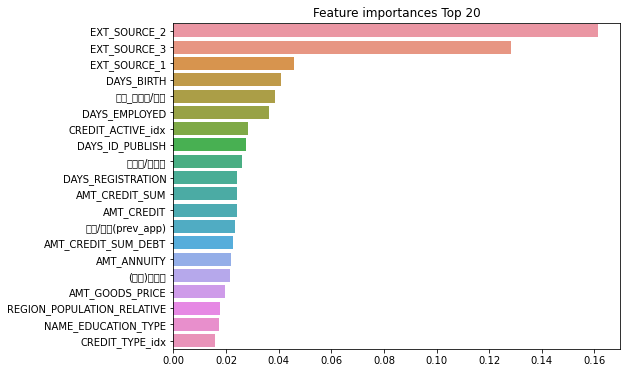

In [12]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [23]:
# FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
# 그래프 설명
# 일반적으로 곡선 자체는 FPR과 TPR의 변화값을 보는데 이용하고
# 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정
# AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로
# 일반적으로 1에 가까울 수록 좋음
# AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
# 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할 수록
# 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는
# 좋은 ROC AUC 성능 수치를 얻게 됨
# 가운데 직선은 랜덤 수준의 이진 분류 AUC 값으로 0.5
# 따라서 보통의 분류는 0.5 이상의 AUC 값을 가짐

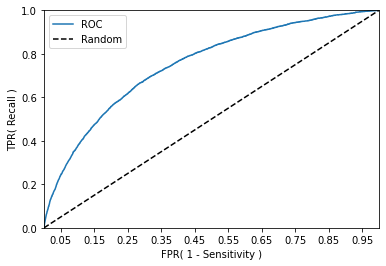

In [14]:
roc_curve_plot(y_test, pred_probas)

### oversampling 작업 후 비교

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
# train data set으로 들어오는 값들에 대해서 Over Sampling
# target값 분포에 맞춰 feature 값 생성
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 feature/label data set : ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 feature/label data set : ', X_train_over.shape, y_train_over.shape)


SMOTE 적용 전 학습용 feature/label data set :  (243075, 142) (243075, 1)
SMOTE 적용 후 학습용 feature/label data set :  (447006, 142) (447006, 1)


In [45]:
# 원래의 label값 두 개 분포
y_train.value_counts()

TARGET
0.0       223503
1.0        19572
dtype: int64

In [46]:
y_train_over.value_counts()

TARGET
0.0       223503
1.0       223503
dtype: int64

In [48]:
# Oversampling 적용하여 수행

rf_clf = RandomForestClassifier(n_estimators=100, 
                                max_depth=12,
                                min_samples_leaf=12,
                                min_samples_split=8,
                                random_state=2021, verbose = 1, n_jobs = -1)
rf_clf.fit(X_train_over, y_train_over) # 학습

pred_probas = rf_clf.predict_proba(X_test)[:,1] # 예측
roc_auc = roc_auc_score(y_test, pred_probas)

print('AUC:{0:.4f}'.format(roc_auc))
print('수행 시간 : {0:.1f}'.format(time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


AUC:0.7054
수행 시간 : 2105.0


In [59]:
pred_smote = rf_clf.predict(X_test)
get_clf_eval(y_test, pred_smote, pred_probas)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


오차 행렬
[[54675  1201]
 [ 4502   391]]
정확도 : 0.9062, 정밀도: 0.2456, 재현율 : 0.0799,    F1 : 0.1206, AUC:0.7054


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


### raw data log변환 후 모델 예측

In [ ]:
data_log

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,100002,0,0,1,0,12.218500,406597.5,10.114619,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,1,100003,0,0,0,0,12.506181,1293502.5,10.482892,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,2,100004,1,1,1,0,11.119898,135000.0,8.817446,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,3,100006,0,0,1,0,11.813037,312682.5,10.298481,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,4,100007,0,0,1,0,11.707678,513000.0,9.992711,513000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303839,303839,456251,0,0,0,0,11.967187,254700.0,10.224084,225000.0,...,0,0,0,0,0,0,0,0,0,0
303840,303840,456252,0,0,1,0,11.184435,269550.0,9.392870,225000.0,...,0,0,0,0,0,0,0,0,0,1
303841,303841,456253,0,0,1,0,11.938200,677664.0,10.308286,585000.0,...,0,0,0,0,0,0,0,0,0,0
303842,303842,456254,0,0,1,0,12.049425,370107.0,9.913735,319500.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_log_target = data_log[['TARGET']]
X_log_features = data_log.drop(columns=['Unnamed: 0','SK_ID_CURR','TARGET'])

In [ ]:
# 학습/테스트 데이터 세트 분리
X_log_train , X_log_test , y_log_train , y_log_test = train_test_split(X_log_features , y_log_target, test_size=0.2, stratify=y_log_target, random_state=2021)

In [ ]:
# 하이퍼 파라미터 튜닝 후(n=4000) 학습/예측/평가

rf_clf = RandomForestClassifier(n_estimators=4000, 
                                max_depth=12,
                                min_samples_leaf=12,
                                min_samples_split=8,
                                random_state=2021, verbose = 1, n_jobs = -1)
rf_clf.fit(X_log_train, y_log_train) # 학습

pred_probas_log = rf_clf.predict_proba(X_log_test)[:,1] # 예측
roc_auc = roc_auc_score(y_log_test, pred_probas_log)

print('AUC:{0:.4f}'.format(roc_auc))
print('수행 시간 : {0:.1f}'.format(time.time() - start_time))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 30.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: 

AUC:0.7510
수행 시간 : 2076.0


[Parallel(n_jobs=4)]: Done 4000 out of 4000 | elapsed:   41.7s finished


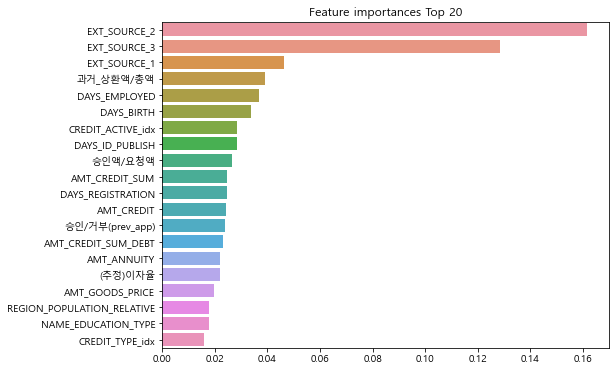

In [ ]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_log_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### raw data log변환 & scale 후 모델 예측

In [2]:
data_scaled

NameError: name 'data_scaled' is not defined

In [16]:
y_scaled_target = data_scaled[['TARGET']]
X_scaled_features = data_scaled.drop(columns=['Unnamed: 0','SK_ID_CURR','TARGET'])

In [17]:
# 학습/테스트 데이터 세트 분리
X_scaled_train, X_scaled_test , y_scaled_train , y_scaled_test = train_test_split(X_scaled_features , y_scaled_target, test_size=0.2, stratify=y_scaled_target, random_state=2021)

In [1]:
# 하이퍼 파라미터 튜닝 후(n=4000), log변환 & scale 후 모델 학습/예측/평가

rf_clf = RandomForestClassifier(n_estimators=4000, 
                                max_depth=12,
                                min_samples_leaf=12,
                                min_samples_split=8,
                                random_state=2021, verbose = 1, n_jobs = -1)
rf_clf.fit(X_scaled_train, y_scaled_train) # 학습

pred_probas_scaled = rf_clf.predict_proba(X_scaled_test)[:,1] # 예측
roc_auc = roc_auc_score(y_scaled_test, pred_probas_scaled)

print('AUC:{0:.4f}'.format(roc_auc))
print('수행 시간 : {0:.1f}'.format(time.time() - start_time))

NameError: name 'RandomForestClassifier' is not defined

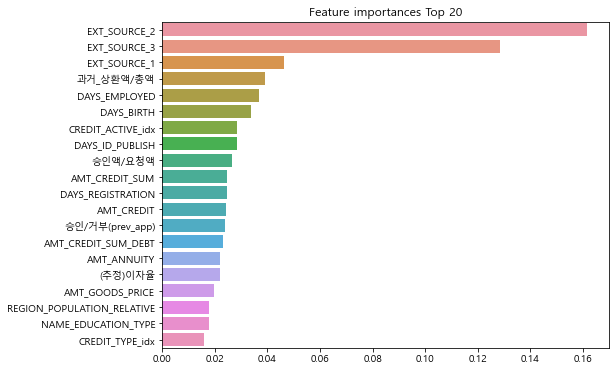

In [26]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_scaled_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

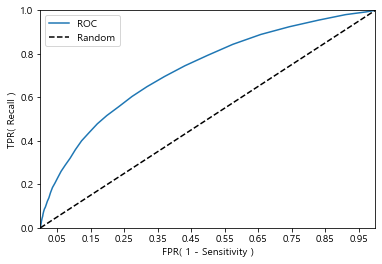

In [27]:
roc_curve_plot(y_scaled_test, pred_probas)